<a href="https://colab.research.google.com/github/MUbarak123-56/emotion-detection/blob/master/models/resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.3 MB/s 
     |████████████████████████████████| 4.9 MB 72.2 MB/s 
     |████████████████████████████████| 431 kB 82.3 MB/s 
     |████████████████████████████████| 1.3 MB 63.4 MB/s 
     |████████████████████████████████| 115 kB 82.3 MB/s 
     |████████████████████████████████| 163 kB 80.3 MB/s 
     |████████████████████████████████| 212 kB 78.4 MB/s 
     |████████████████████████████████| 127 kB 76.7 MB/s 
     |████████████████████████████████| 6.6 MB 67.9 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = Path('/content/gdrive/MyDrive/GitHub/emotion-detection/data/train')

In [4]:
pic=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224))

In [5]:
dls = pic.dataloaders(path)

In [6]:
train_ds = dls.train_ds.items[:-1]
val_ds = dls.valid_ds.items[:-1]

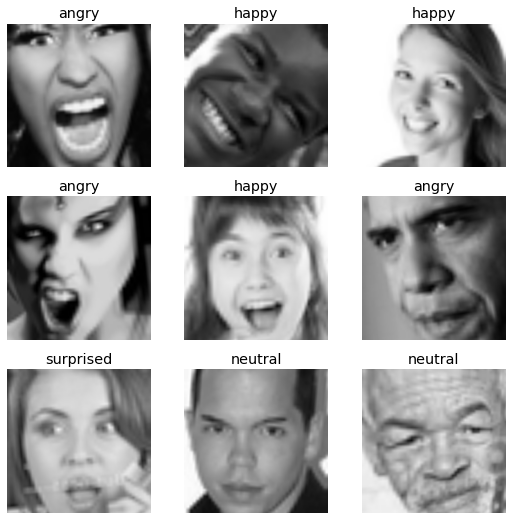

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [10]:
learn.fine_tune(4, 6.9e-4)

epoch,train_loss,valid_loss,error_rate,time
0,2.169866,1.672068,0.592057,25:22


epoch,train_loss,valid_loss,error_rate,time
0,1.562968,1.289104,0.474830,26:05
1,1.234127,1.073170,0.404982,26:15
2,1.077072,1.005981,0.373977,26:28


epoch,train_loss,valid_loss,error_rate,time
0,1.562968,1.289104,0.474830,26:05
1,1.234127,1.073170,0.404982,26:15
2,1.077072,1.005981,0.373977,26:28
3,0.980241,0.992114,0.367532,27:15


In [11]:
interp = Interpretation.from_learner(learn)

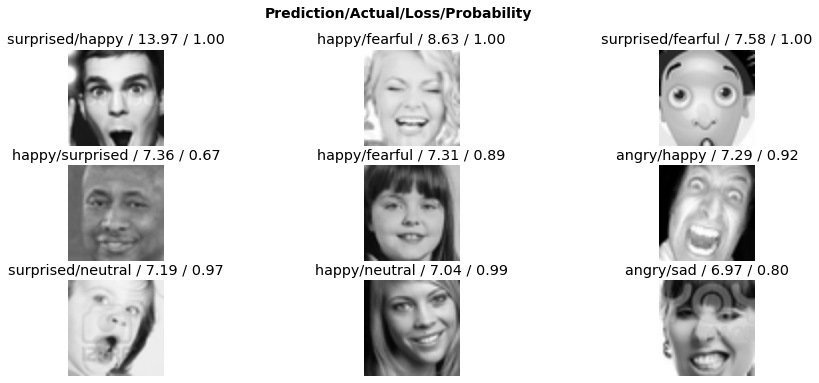

In [12]:
interp.plot_top_losses(9, figsize = (15,6))

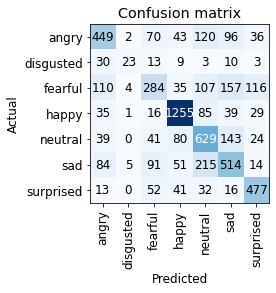

In [13]:
interp_class = ClassificationInterpretation.from_learner(learn)
interp_class.plot_confusion_matrix()

In [14]:
learn.export("resnet-50.pkl")